In [5]:
!pip install geopandas

In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Data Cleaning

### neighbourhoods

In [16]:
from google.colab import files

uploaded = files.upload()

Saving neighbourhoods.geojson to neighbourhoods.geojson


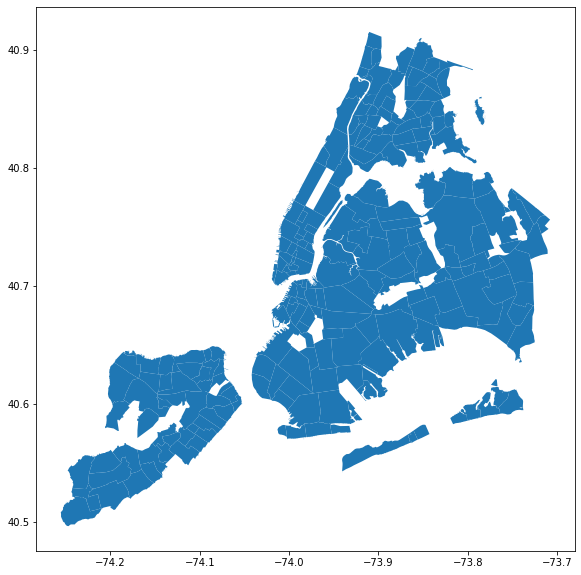

In [7]:
neighbourhoods = gpd.read_file('neighbourhoods.geojson')
neighbourhoods.plot(figsize=(10,10))

In [19]:
neighbourhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### subway station

In [21]:
uploaded = files.upload()

Saving stationlocation.csv to stationlocation.csv


In [8]:
station = pd.read_csv('stationlocation.csv')
station.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [9]:
from shapely.geometry import Point

Geometrysta = [Point(xy) for xy in zip(station.gtfs_longitude, station.gtfs_latitude)]
stationgeo = gpd.GeoDataFrame(station,geometry=Geometrysta,crs={'init': 'epsg:4326'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [24]:
stationgeo.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,POINT (-73.91203 40.77504)
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,POINT (-73.91784 40.77026)
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92148 40.76678)
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92551 40.76182)
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92957 40.75680)


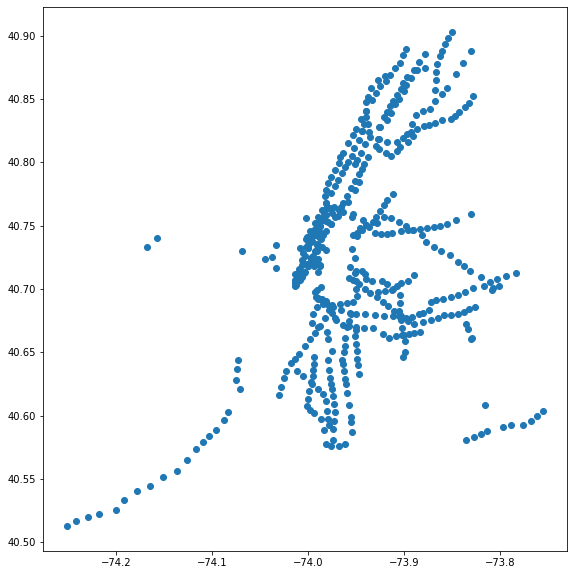

In [25]:
stationgeo.plot(figsize=(10,10))

### turnstiles

In [26]:
df200104 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200104.txt')
print('df200104 is uploaded')
df200111 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200111.txt')
print('df200111 is uploaded')
df200118 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200118.txt')
print('df200118 is uploaded')
df200125 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200125.txt')
print('df200125 is uploaded')

df200104 is uploaded
df200111 is uploaded
df200118 is uploaded
df200125 is uploaded


In [27]:
turnstiles = pd.concat([df200104, df200111, df200118, df200125]) #, df190202, df190209, df190216, df190223])
turnstiles.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713


In [28]:
turnstiles.columns =['C/A','unit','SCP','Station','linename','division','date','time','desc','entries','exits']
turnstiles['datetime'] = pd.to_datetime(turnstiles.date + ' ' + turnstiles.time, format='%m/%d/%Y  %H:%M:%S')
turnstiles['turnstile'] = turnstiles['C/A'] + '-' + turnstiles['unit'] + '-' + turnstiles['SCP']
turnstiles.head()

,C/A,unit,SCP,Station,linename,division,date,time,desc,entries,exits,datetime,turnstile
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,2019-12-28 15:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,2019-12-28 19:00:00,A002-R051-02-00-00


In [29]:
stationgeo['stopname'] = stationgeo.stop_name.str.lower()
stationgeo.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry,stopname
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,POINT (-73.91203 40.77504),astoria - ditmars blvd
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,POINT (-73.91784 40.77026),astoria blvd
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92148 40.76678),30 av
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92551 40.76182),broadway
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92957 40.75680),36 av


In [30]:
turnstiles['stopname'] = turnstiles.Station.str.lower()
turnstiles.head()

,C/A,unit,SCP,Station,linename,division,date,time,desc,entries,exits,datetime,turnstile,stopname
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,59 st
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,59 st
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00,59 st
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,2019-12-28 15:00:00,A002-R051-02-00-00,59 st
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,2019-12-28 19:00:00,A002-R051-02-00-00,59 st


In [31]:
# turnstiles['stopname'] = turnstiles.Station.str.lower()
stationdf = pd.merge(turnstiles, stationgeo, how='left', on='stopname')
stationdf.head()

,C/A,unit,SCP,Station,linename,division_x,date,time,desc,entries,exits,datetime,turnstile,stopname,ogc_fid,station_id,complex_id,gtfs_stop_id,division_y,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,59 st,35.0,35.0,35,R41,BMT,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,POINT (-74.01788 40.64136)
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,59 st,401.0,400.0,613,629,IRT,Lexington Av,59 St,M,4 5 6,Subway,40.762526,-73.967967,Uptown & The Bronx,Downtown & Brooklyn,POINT (-73.96797 40.76253)
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,59 st,35.0,35.0,35,R41,BMT,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,POINT (-74.01788 40.64136)
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,59 st,401.0,400.0,613,629,IRT,Lexington Av,59 St,M,4 5 6,Subway,40.762526,-73.967967,Uptown & The Bronx,Downtown & Brooklyn,POINT (-73.96797 40.76253)
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00,59 st,35.0,35.0,35,R41,BMT,4th Av,59 St,Bk,N R,Subway,40.641362,-74.017881,Manhattan,Coney Island - Bay Ridge,POINT (-74.01788 40.64136)


In [32]:
stationdf.columns

Index(['C/A', 'unit', 'SCP', 'Station', 'linename', 'division_x', 'date',
       'time', 'desc', 'entries', 'exits', 'datetime', 'turnstile', 'stopname',
       'ogc_fid', 'station_id', 'complex_id', 'gtfs_stop_id', 'division_y',
       'line', 'stop_name', 'borough', 'daytime_routes', 'structure',
       'gtfs_latitude', 'gtfs_longitude', 'north_direction_label',
       'south_direction_label', 'geometry'],
      dtype='object')

In [33]:
stationdf.shape

(1364899, 29)

In [34]:
stationdf.dropna().shape

(958119, 29)

In [35]:
stationdf = stationdf[['stopname','linename','date','time','entries','exits','datetime' ,'turnstile','borough', 'gtfs_latitude', 'gtfs_longitude','geometry']]
stationdf.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry
0,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
1,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
2,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
3,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
4,59 st,NQR456W,12/28/2019,11:00:00,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)


In [36]:
stationdf.dropna(inplace=True)
stationdf.shape

(983949, 12)

In [37]:
stationdf.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry
0,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
1,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
2,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)
3,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253)
4,59 st,NQR456W,12/28/2019,11:00:00,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136)


### puma shapefile

In [40]:
uploaded = files.upload()

Saving econ_2018_acs5yr_puma.xlsx to econ_2018_acs5yr_puma.xlsx
Saving demo_2018_acs5yr_puma.xlsx to demo_2018_acs5yr_puma.xlsx
Saving geo_export_584fec13-650e-4cb3-b73d-be960dadd865.shp to geo_export_584fec13-650e-4cb3-b73d-be960dadd865.shp
Saving hous_2018_acs5yr_puma.xlsx to hous_2018_acs5yr_puma.xlsx
Saving soc_2018_acs5yr_puma.xlsx to soc_2018_acs5yr_puma.xlsx


In [43]:
uploaded = files.upload()

Saving geo_export_584fec13-650e-4cb3-b73d-be960dadd865.shx to geo_export_584fec13-650e-4cb3-b73d-be960dadd865.shx


In [49]:
PUMA = gpd.read_file('geo_export_584fec13-650e-4cb3-b73d-be960dadd865.shp')
PUMA.crs = "EPSG:4326"
PUMA.to_crs("EPSG:4326")
PUMA.head()
#PUMA['PUMA'] = pd.to_numeric(PUMA['puma'])

,geometry
0,"POLYGON ((-73.89641 40.90450, -73.89636 40.903..."
1,"POLYGON ((-73.86477 40.90201, -73.86305 40.901..."
2,"MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ..."
3,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
4,"POLYGON ((-73.95375 40.63859, -73.95360 40.638..."


In [ ]:
PUMA.head()

### pluto

In [ ]:
uploaded = giles.upload()

In [ ]:
pluto = pd.read_csv('pluto_21v3.csv')

In [ ]:
pluto.head()

In [ ]:
pluto.describe()

In [ ]:
pluto.columns

# puma

In [ ]:
uploaded = giles.upload()

In [ ]:
demo_puma = pd.read_excel('demo_2018_acs5yr_puma.xlsx')
econ_puma = pd.read_excel('econ_2018_acs5yr_puma.xlsx')
hous_puma = pd.read_excel('hous_2018_acs5yr_puma.xlsx')
soc_puma = pd.read_excel('soc_2018_acs5yr_puma.xlsx')

In [ ]:
soc_puma.head()

,GeoType,GeogName,GeoID,Borough,HH1E,HH1M,HH1C,HH1P,HH1Z,Fam1E,...,HHCompE,HHCompM,HHCompC,HHCompP,HHCompZ,HHIntE,HHIntM,HHIntC,HHIntP,HHIntZ
0,PUMA2010,NYC-Bronx Community District 1 & 2--Hunts Poin...,3710,Bronx,51349,623,0.7,100,NaN,33386,...,41032,774,1.1,79.9,1.2,34238,935,1.7,66.7,1.5
1,PUMA2010,"NYC-Bronx Community District 10--Co-op City, P...",3703,Bronx,47830,524,0.7,100,NaN,29327,...,40409,834,1.3,84.5,1.5,36659,892,1.5,76.6,1.7
2,PUMA2010,NYC-Bronx Community District 11--Pelham Parkwa...,3704,Bronx,44949,459,0.6,100,NaN,30419,...,38663,531,0.8,86.0,0.9,34351,699,1.2,76.4,1.3
3,PUMA2010,"NYC-Bronx Community District 12--Wakefield, Wi...",3702,Bronx,49673,556,0.7,100,NaN,33875,...,42965,677,1.0,86.5,1.1,36442,771,1.3,73.4,1.4
4,PUMA2010,"NYC-Bronx Community District 3 & 6--Belmont, C...",3705,Bronx,57837,610,0.6,100,NaN,38108,...,47267,868,1.1,81.7,1.2,38291,844,1.3,66.2,1.4


In [ ]:
demo_cols = ['GeogName','GeoID','PopU181P','Pop65pl1P','WtNHP','MdAgeE']
econ_cols = ['GeogName','GeoID','CvLFUEm2P','MnTrvTmE','MdHHIncE']
hous_cols = ['GeogName','GeoID','NoVhclAvE','MdVlE','MdGRE','HU1uDE','ROcHU1E']#,'Shape_Area','geometry']
soc_cols = ['GeogName','GeoID','HH1plU18P','EA_BchDHP', 'Fb1P','LgOEnLEP1P','NtvE']#'HH1plU18P', 'EA_BchDHP', 'Fb1P','LgOEnLEP1P']

demo_puma = demo_puma[demo_cols]
econ_puma = econ_puma[econ_cols]
hous_puma = hous_puma[hous_cols]
soc_puma = soc_puma[soc_cols]

In [ ]:
demo_puma = demo_puma.merge(econ_puma, on=['GeogName','GeoID'], how='left')
demo_puma = demo_puma.merge(hous_puma, on=['GeogName','GeoID'], how='left')
demo_puma = demo_puma.merge(soc_puma, on=['GeogName','GeoID'], how='left')
demo_puma.columns = ['name','PUMA_ID','pct_under_18','pct_over_65','pct_white','median_age',#'pct_latino','pct_aa',
                     'unemployment_rt','travel_time','median_income',
                     'no_vehicle_rate','median_value','median_rent','pct_w_children', 'bachelors_degree',#'area_size','geometry'
                     'pct_foreign_born','pct_poor_english', 'pct_detached_unit', 'pct_renter','native_pop']#'pct_foreign_born', 'pct_poor_english', 'pct_detached_unit', 'pct_renter' ]

#puma_demo.columns = ['name', 'PUMA', "pct_under_18", 'pct_over_65', 'median_age', 'pct_white', 'unemployment_rt', 'median_income', 'pct_w_children', 'bachelors_degree', 'pct_foreign_born', 'pct_poor_english', 'pct_detached_unit', 'pct_renter' ]

demo_puma.head(3)

,name,PUMA_ID,pct_under_18,pct_over_65,pct_white,median_age,unemployment_rt,travel_time,median_income,no_vehicle_rate,median_value,median_rent,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,native_pop
0,NYC-Bronx Community District 1 & 2--Hunts Poin...,3710,27.9,8.8,2.0,30.5,11.8,43.4,24849,37993,366600,932,930,47557,41.5,10.7,30.2,33.7,110452
1,"NYC-Bronx Community District 10--Co-op City, P...",3703,19.4,19.9,27.5,42.6,7.4,45.1,59798,15911,355000,1192,7320,25768,28.1,27.9,21.3,11.9,95451
2,NYC-Bronx Community District 11--Pelham Parkwa...,3704,22.3,14.4,21.7,37.0,9.7,44.0,50877,19829,449900,1322,4946,31208,35.5,24.8,33.6,22.7,85845


In [ ]:
demo_puma.describe()

,PUMA_ID,pct_under_18,pct_over_65,pct_white,median_age,unemployment_rt,travel_time,median_income,no_vehicle_rate,median_value,median_rent,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,native_pop
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,3936.218182,20.987273,14.030909,32.114545,36.714545,7.181818,41.698182,62865.400000,31304.454545,6.143109e+05,1458.545455,5816.836364,38623.054545,30.421818,36.274545,36.709091,22.785455,96663.709091
std,149.997616,4.993887,3.655786,23.717218,3.963370,2.526606,5.808247,26099.032774,16837.449692,2.392734e+05,370.965348,7549.415527,14161.600797,8.197011,18.282589,11.834605,13.039064,24758.798660
min,3701.000000,8.200000,8.200000,1.100000,28.000000,2.800000,25.400000,24849.000000,4560.000000,1.949000e+05,919.000000,225.000000,10354.000000,9.300000,10.700000,15.900000,5.800000,52101.000000
25%,3804.500000,18.850000,11.500000,12.300000,34.600000,5.200000,39.200000,47637.500000,20405.500000,4.526000e+05,1243.500000,968.500000,29421.500000,26.700000,24.800000,27.650000,11.750000,77109.000000
50%,4005.000000,21.300000,13.100000,27.500000,36.700000,6.700000,43.400000,55569.000000,28261.000000,5.614000e+05,1366.000000,2131.000000,37222.000000,30.800000,31.800000,35.500000,22.500000,95231.000000
75%,4059.500000,23.250000,16.600000,50.000000,38.850000,8.700000,46.100000,73022.000000,38043.500000,7.673500e+05,1538.000000,7036.000000,46320.500000,36.750000,41.500000,44.750000,31.350000,113558.000000
max,4114.000000,36.800000,23.900000,82.900000,45.400000,13.800000,51.100000,140213.000000,79936.000000,1.215500e+06,2690.000000,34284.000000,70383.000000,43.700000,82.200000,62.800000,52.000000,164649.000000


In [ ]:
#demo_puma.to_csv('NYC_puma_2018_v2.csv')

# calculate difference of turnstiles

In [ ]:
from datetime import datetime as dt

In [ ]:
stationdf['hour'] = stationdf.datetime.dt.hour
turnstiles_morning = stationdf.loc[(stationdf['hour'] < 12)]
turnstiles_morning.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry,hour
0,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),3
1,59 st,NQR456W,12/28/2019,03:00:00,7324295,2482512,2019-12-28 03:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),3
2,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),7
3,59 st,NQR456W,12/28/2019,07:00:00,7324305,2482523,2019-12-28 07:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),7
4,59 st,NQR456W,12/28/2019,11:00:00,7324371,2482594,2019-12-28 11:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),11


In [ ]:
turnstiles_afternoon = stationdf.loc[(stationdf['hour'] > 11)]
turnstiles_afternoon.head()

,stopname,linename,date,time,entries,exits,datetime,turnstile,borough,gtfs_latitude,gtfs_longitude,geometry,hour
6,59 st,NQR456W,12/28/2019,15:00:00,7324587,2482647,2019-12-28 15:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),15
7,59 st,NQR456W,12/28/2019,15:00:00,7324587,2482647,2019-12-28 15:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),15
8,59 st,NQR456W,12/28/2019,19:00:00,7324963,2482713,2019-12-28 19:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),19
9,59 st,NQR456W,12/28/2019,19:00:00,7324963,2482713,2019-12-28 19:00:00,A002-R051-02-00-00,M,40.762526,-73.967967,POINT (-73.96797 40.76253),19
10,59 st,NQR456W,12/28/2019,23:00:00,7325143,2482753,2019-12-28 23:00:00,A002-R051-02-00-00,Bk,40.641362,-74.017881,POINT (-74.01788 40.64136),23


In [ ]:
morning = turnstiles_morning[['stopname','entries','exits','geometry']]
morning = morning.groupby('stopname').agg({'entries':'sum','exits':'sum'})
morning = morning.merge(stationgeo,on='stopname',how='left')
morning = morning[['stopname','entries','exits','geometry']]
morning = gpd.GeoDataFrame(morning)
morning['diff'] = morning.entries - morning.exits
morning.head()

,stopname,entries,exits,geometry,diff
0,1 av,38352740552,37417562183,POINT (-73.98163 40.73095),935178369
1,103 st,33630369549,29398293552,POINT (-73.96145 40.79609),4232075997
2,103 st,33630369549,29398293552,POINT (-73.96838 40.79945),4232075997
3,103 st,33630369549,29398293552,POINT (-73.94748 40.79060),4232075997
4,104 st,284118554494,166274814784,POINT (-73.84433 40.69518),117843739710


Text(0.5, 1.0, 'Difference between Entries and Exits in New York City (Morning)')

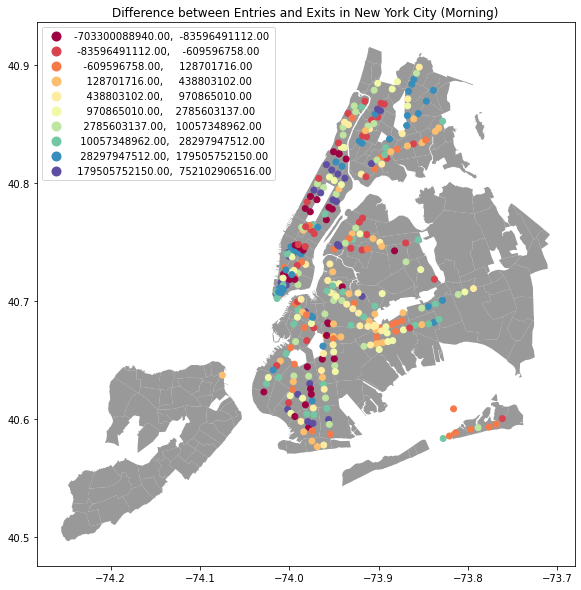

In [ ]:
# purple means 'working stations'; yellow means 'living stations'
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
morning.plot(column='diff', ax=ax, legend=True, k=10,scheme='quantiles',cmap='Spectral')
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Difference between Entries and Exits in New York City (Morning)')

In [ ]:
afternoon = turnstiles_afternoon[['stopname','entries','exits','geometry']]
afternoon = afternoon.groupby('stopname').agg({'entries':'sum','exits':'sum'})
afternoon = afternoon.merge(stationgeo,on='stopname',how='left')
afternoon = afternoon[['stopname','entries','exits','geometry']]
afternoon = gpd.GeoDataFrame(afternoon)
afternoon['diff'] = afternoon.entries - afternoon.exits
afternoon.head()

,stopname,entries,exits,geometry,diff
0,1 av,38353442460,37418371171,POINT (-73.98163 40.73095),935071289
1,103 st,33496562304,29243768859,POINT (-73.96145 40.79609),4252793445
2,103 st,33496562304,29243768859,POINT (-73.96838 40.79945),4252793445
3,103 st,33496562304,29243768859,POINT (-73.94748 40.79060),4252793445
4,104 st,284118855042,166274959262,POINT (-73.84433 40.69518),117843895780


Text(0.5, 1.0, 'Difference between Entries and Exits in New York City (Afternoon)')

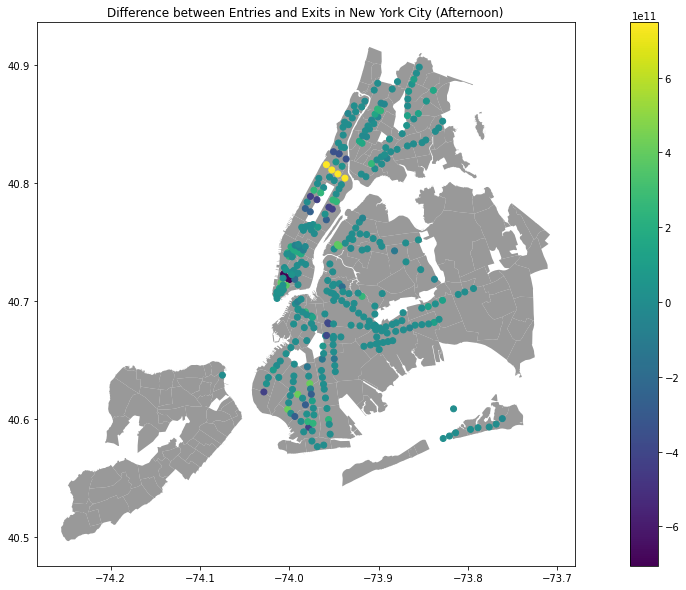

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
afternoon.plot(column='diff', ax=ax, legend=True, k=10)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Difference between Entries and Exits in New York City (Afternoon)')

In [ ]:
turn = stationdf[['stopname','entries','exits','geometry']]
turn = turn.groupby('stopname').agg({'entries':'sum','exits':'sum'})
turn = turn.merge(stationgeo,on='stopname',how='left')
turn = turn[['stopname','entries','exits','geometry']]
turn = gpd.GeoDataFrame(turn)
turn['diff'] = turn.entries - turn.exits
turn.head()

,stopname,entries,exits,geometry,diff
0,1 av,76706183012,74835933354,POINT (-73.98163 40.73095),1870249658
1,103 st,67126931853,58642062411,POINT (-73.96145 40.79609),8484869442
2,103 st,67126931853,58642062411,POINT (-73.96838 40.79945),8484869442
3,103 st,67126931853,58642062411,POINT (-73.94748 40.79060),8484869442
4,104 st,568237409536,332549774046,POINT (-73.84433 40.69518),235687635490


Text(0.5, 1.0, 'Entries of Every Subway Station in New York City')

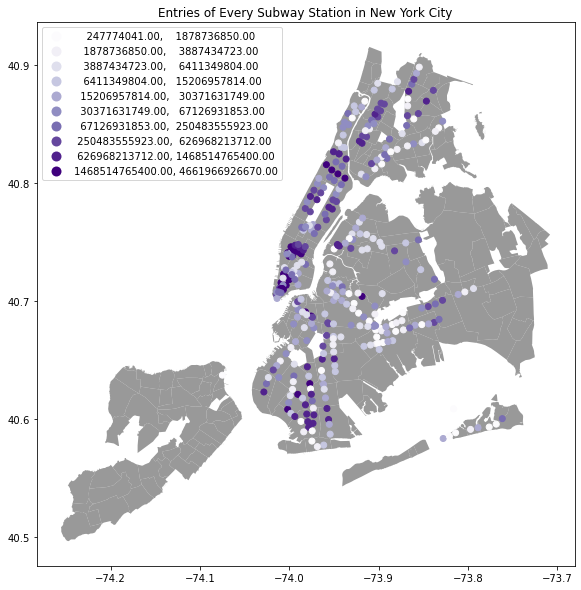

In [ ]:
# since the exits of subway datasets are not accurate, we just neglect the difference between morning and afternoon

fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
turn.plot(column='entries', ax=ax, legend=True, k=10,scheme='quantiles',cmap='Purples')
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
#plt.legend()
plt.title('Entries of Every Subway Station in New York City')

In [ ]:
turn.to_file('turnstiles.shp')

In [ ]:
stationgeo.dtypes

ogc_fid                     int64
station_id                float64
complex_id                 object
gtfs_stop_id               object
division                   object
line                       object
stop_name                  object
borough                    object
daytime_routes             object
structure                  object
gtfs_latitude             float64
gtfs_longitude            float64
north_direction_label      object
south_direction_label      object
geometry                 geometry
stopname                   object
dtype: object

In [ ]:
StationByPUMA = gpd.sjoin(PUMA, turn, how='left', op='intersects')
StationByPUMA['PUMA'] = pd.to_numeric(StationByPUMA['PUMA'])

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-43-2e0426bd8bc6>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  StationByPUMA = gpd.sjoin(PUMA, turn, how='left', op='intersects')


In [ ]:
StationByPUMA.head()

,puma,shape_area,shape_leng,geometry,PUMA,index_right,stopname,entries,exits,diff
0,3701,9.792852e+07,53227.113213,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",3701,260.0,kingsbridge rd,5.154105e+11,5.778869e+11,-6.247642e+10
0,3701,9.792852e+07,53227.113213,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",3701,65.0,231 st,8.607713e+09,3.994277e+08,8.208285e+09
0,3701,9.792852e+07,53227.113213,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",3701,67.0,238 st,4.130152e+09,2.102011e+08,3.919951e+09
1,3702,1.889936e+08,106167.593516,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",3702,242.0,gun hill rd,6.928359e+11,5.785251e+11,1.143108e+11
1,3702,1.889936e+08,106167.593516,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",3702,57.0,219 st,1.566649e+11,5.566780e+10,1.009971e+11


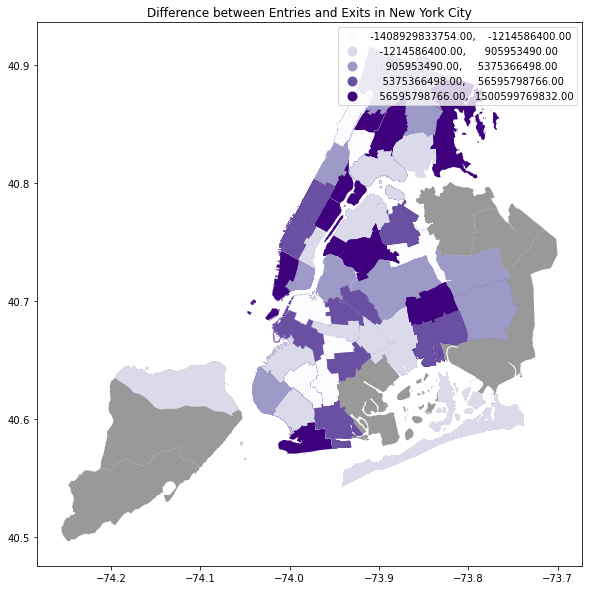

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
PUMA.plot(ax=ax, alpha=0.8,color='grey')
StationByPUMA.plot(column='diff', ax=ax, legend=True, scheme='quantiles',k=5,cmap='Purples')
plt.title('Difference between Entries and Exits in New York City')
plt.show()

Text(0.5, 1.0, 'Difference between Entries and Exits in New York City')

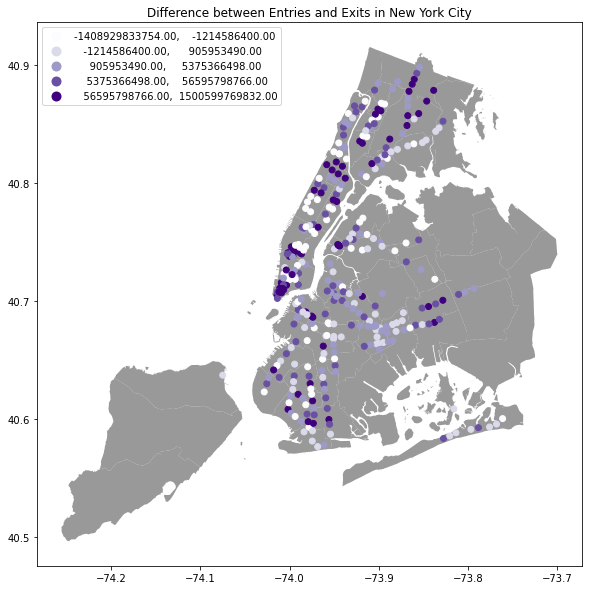

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
PUMA.plot(ax=ax, alpha=0.8,color='grey')
turn.plot(column='diff', ax=ax, legend=True, scheme='quantiles',k=5,cmap='Purples')
plt.title('Difference between Entries and Exits in New York City')
# plt.savefig('nyc_ridership_change.png')

# pca on pluto

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
demo_puma.shape

(55, 19)

<AxesSubplot:>

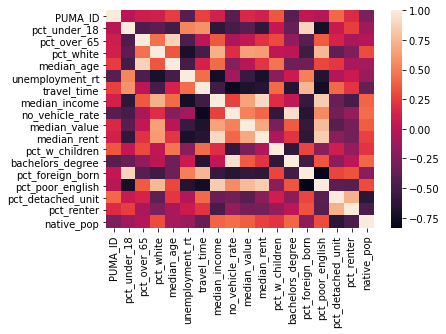

In [ ]:
sns.heatmap(demo_puma.corr())

In [ ]:
demo_puma.head(3)

,name,PUMA_ID,pct_under_18,pct_over_65,pct_white,median_age,unemployment_rt,travel_time,median_income,no_vehicle_rate,median_value,median_rent,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,native_pop
0,NYC-Bronx Community District 1 & 2--Hunts Poin...,3710,27.9,8.8,2.0,30.5,11.8,43.4,24849,37993,366600,932,930,47557,41.5,10.7,30.2,33.7,110452
1,"NYC-Bronx Community District 10--Co-op City, P...",3703,19.4,19.9,27.5,42.6,7.4,45.1,59798,15911,355000,1192,7320,25768,28.1,27.9,21.3,11.9,95451
2,NYC-Bronx Community District 11--Pelham Parkwa...,3704,22.3,14.4,21.7,37.0,9.7,44.0,50877,19829,449900,1322,4946,31208,35.5,24.8,33.6,22.7,85845


In [ ]:
demo_puma.columns

Index(['name', 'PUMA_ID', 'pct_under_18', 'pct_over_65', 'pct_white',
       'median_age', 'unemployment_rt', 'travel_time', 'median_income',
       'no_vehicle_rate', 'median_value', 'median_rent', 'pct_w_children',
       'bachelors_degree', 'pct_foreign_born', 'pct_poor_english',
       'pct_detached_unit', 'pct_renter', 'native_pop'],
      dtype='object')

In [ ]:
puma = demo_puma[['PUMA_ID', "pct_under_18", 'pct_over_65', 'pct_white', 'median_age', 'unemployment_rt', 'travel_time', 'median_income', 'no_vehicle_rate', 'median_value', 'median_rent', 'pct_w_children', 'bachelors_degree', 'pct_foreign_born', 'pct_poor_english', 'pct_detached_unit', 'pct_renter', 'native_pop']]
puma.head()

,PUMA_ID,pct_under_18,pct_over_65,pct_white,median_age,unemployment_rt,travel_time,median_income,no_vehicle_rate,median_value,median_rent,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,native_pop
0,3710,27.9,8.8,2.0,30.5,11.8,43.4,24849,37993,366600,932,930,47557,41.5,10.7,30.2,33.7,110452
1,3703,19.4,19.9,27.5,42.6,7.4,45.1,59798,15911,355000,1192,7320,25768,28.1,27.9,21.3,11.9,95451
2,3704,22.3,14.4,21.7,37.0,9.7,44.0,50877,19829,449900,1322,4946,31208,35.5,24.8,33.6,22.7,85845
3,3702,22.3,13.2,6.3,36.7,9.9,47.1,51581,20967,415400,1330,6752,30829,36.5,23.4,40.4,9.0,88680
4,3705,28.4,9.4,4.0,29.7,13.8,44.2,25595,38466,385000,999,1473,53874,42.3,13.2,31.4,27.5,117845


In [ ]:
scaler = StandardScaler()
pumaS = scaler.fit_transform(demo_puma.iloc[:,2:])
pumaS = pd.DataFrame(index=demo_puma['PUMA_ID'], columns=demo_puma.iloc[:,2:].columns, data=pumaS)

In [ ]:
pumaS.head()

,pct_under_18,pct_over_65,pct_white,median_age,unemployment_rt,travel_time,median_income,no_vehicle_rate,median_value,median_rent,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,native_pop
PUMA_ID,,,,,,,,,,,,,,,,,
3710,1.396996,-1.444046,-1.281436,-1.582447,1.844667,0.295701,-1.470046,0.400903,-1.044805,-1.432475,-0.653279,0.636672,1.363947,-1.411740,-0.555074,0.844780,0.562038
3703,-0.320773,1.620222,-0.196358,1.498649,0.087150,0.591086,-0.118613,-0.922665,-1.093732,-0.725141,0.200945,-0.916107,-0.285862,-0.462283,-1.314037,-0.842529,-0.049432
3704,0.265290,0.101891,-0.443160,0.072687,1.005852,0.399954,-0.463576,-0.687825,-0.693459,-0.371474,-0.116415,-0.528429,0.625226,-0.633406,-0.265133,-0.006614,-0.440992
3702,0.265290,-0.229381,-1.098462,-0.003704,1.085739,0.938597,-0.436354,-0.619615,-0.838974,-0.349710,0.125014,-0.555438,0.748346,-0.710688,0.314749,-1.066987,-0.325432
3705,1.498041,-1.278410,-1.196332,-1.786156,2.643539,0.434705,-1.441200,0.429255,-0.967197,-1.250200,-0.580690,1.086848,1.462443,-1.273737,-0.452742,0.364903,0.863391


In [ ]:
pca = PCA(2)
puma_pca=pca.fit_transform(pumaS)
eigenvalues = pca.explained_variance_ratio_

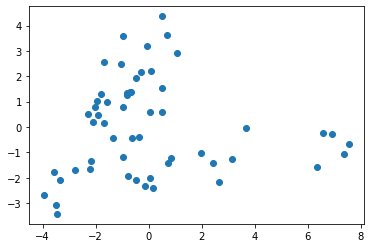

In [ ]:
puma_pca = pd.DataFrame(puma_pca)
plt.scatter(puma_pca[0], puma_pca[1])

In [ ]:
puma_pca.head()

,0,1
0,-3.498478,-3.066297
1,-0.485771,1.921171
2,-1.698685,0.165058
3,-2.111565,0.190039
4,-3.454430,-3.429419


In [ ]:
SSE = []
for i in range(2,7):
    km = KMeans(n_clusters = i)
    res=km.fit(pumaS)
    SSE.append(res.inertia_)
print(SSE)

[634.0234654769836, 496.71323243408415, 431.4068739911001, 364.8318842128517, 331.14343704724945]


In [ ]:
km = KMeans(3)
res=km.fit(pumaS)
pumaS['cluster'] = res.labels_
res.labels_

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
puma_pca['cluster'] = res.labels_

In [ ]:
puma_pca.head()

,0,1,cluster
0,-3.498478,-3.066297,2
1,-0.485771,1.921171,1
2,-1.698685,0.165058,2
3,-2.111565,0.190039,2
4,-3.454430,-3.429419,2


In [ ]:
puma_pca.groupby('cluster').mean()

,0,1
cluster,,
0,4.861567,-0.978532
1,-0.642257,1.836918
2,-1.538353,-1.475628


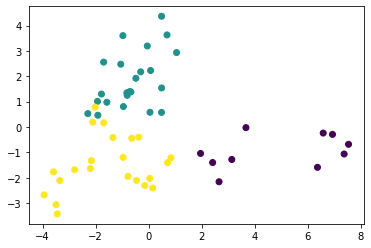

In [ ]:
fig, ax = plt.subplots()
plt.scatter(puma_pca[0], puma_pca[1], c = puma_pca['cluster'], cmap='viridis')

In [ ]:
puma['cluster'] = res.labels_
puma.groupby('cluster').mean()

,PUMA_ID,pct_under_18,pct_over_65,pct_white,median_age,unemployment_rt,travel_time,median_income,no_vehicle_rate,median_value,median_rent,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,native_pop
cluster,,,,,,,,,,,,,,,,,,
0,3895.600000,14.680000,14.740000,59.940000,36.980000,4.920000,32.220000,99520.500000,55947.700000,960930.000000,2024.100000,1299.400000,55457.900000,18.030000,66.950000,25.620000,12.970000,119432.900000
1,4021.000000,20.700000,16.156522,33.908696,39.804348,6.165217,44.926087,65875.565217,18823.347826,522943.478261,1434.739130,11031.260870,28011.347826,32.252174,32.669565,43.808696,26.078261,88267.521739
2,3866.045455,24.154545,11.486364,17.590909,33.363636,9.272727,42.631818,43057.000000,33151.409091,552277.272727,1226.363636,2418.772727,42064.909091,34.140909,26.100000,34.327273,23.804545,95091.909091


### plot

In [ ]:
StationByPUMA.head()

,puma,shape_area,shape_leng,geometry,PUMA,index_right,stopname,entries,exits,diff
0,3701,9.792852e+07,53227.113213,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",3701,260.0,kingsbridge rd,5.154105e+11,5.778869e+11,-6.247642e+10
0,3701,9.792852e+07,53227.113213,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",3701,65.0,231 st,8.607713e+09,3.994277e+08,8.208285e+09
0,3701,9.792852e+07,53227.113213,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",3701,67.0,238 st,4.130152e+09,2.102011e+08,3.919951e+09
1,3702,1.889936e+08,106167.593516,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",3702,242.0,gun hill rd,6.928359e+11,5.785251e+11,1.143108e+11
1,3702,1.889936e+08,106167.593516,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",3702,57.0,219 st,1.566649e+11,5.566780e+10,1.009971e+11


In [ ]:
puma_turn = gpd.sjoin(PUMA, turn, how='left', op='contains')
puma_turn['PUMA'] = pd.to_numeric(puma_turn['PUMA'])
# puma_turn is the same as StationByPUMA
# StationByPUMA = gpd.sjoin(PUMA, turn, how='left', op='intersects')
# StationByPUMA['PUMA'] = pd.to_numeric(StationByPUMA['PUMA'])

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-72-b89c4e16c82c>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  puma_turn = gpd.sjoin(PUMA, turn, how='left', op='contains')


In [ ]:
puma_demo = demo_puma#.iloc[:,2:]
puma_demo['PUMA'] = pd.to_numeric(puma_demo['PUMA_ID'])

In [ ]:
# NYC_turn = StationByPUMA.merge(puma_turn, on='PUMA')
NYC_turn = StationByPUMA.merge(puma_demo, on='PUMA')

In [ ]:
NYC_turn.head(1)

,puma,shape_area,shape_leng,geometry,PUMA,index_right,stopname,entries,exits,diff,...,no_vehicle_rate,median_value,median_rent,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,native_pop
0,3701,9.792852e+07,53227.113213,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",3701,260.0,kingsbridge rd,5.154105e+11,5.778869e+11,-6.247642e+10,...,19871,301600,1373,2532,28810,29.9,40.3,34.2,20.6,72280


In [ ]:
PUMA['cluster'] = res.labels_

In [ ]:
PUMA.head()

,puma,shape_area,shape_leng,geometry,PUMA,cluster
0,3701,9.792852e+07,53227.113213,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",3701,2
1,3702,1.889936e+08,106167.593516,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",3702,1
2,3703,2.676436e+08,305269.140135,"MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ...",3703,2
3,3704,1.062169e+08,47970.203110,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3704,2
4,4015,8.104577e+07,50007.971678,"POLYGON ((-73.95375 40.63859, -73.95360 40.638...",4015,2


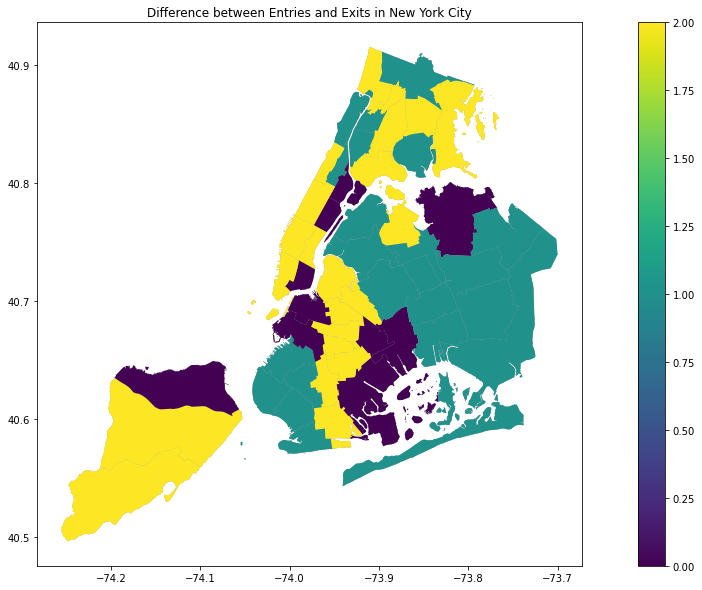

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
PUMA.plot(ax=ax, alpha=0.8,color='grey')
PUMA.plot(ax=ax,alpha=1,column='cluster', cmap='viridis', legend=True)
plt.title('Difference between Entries and Exits in New York City')
plt.show()

ax.legend(['cluster 0', 'cluster 1', 'cluster 2'])
# PUMA.merge(NYC_turn, on='PUMA').drop(columns=['geometry_x','geometry_y']).plot(ax=ax,alpha=1,column='cluster', cmap='viridis', legend=True)#scheme='quantiles', 


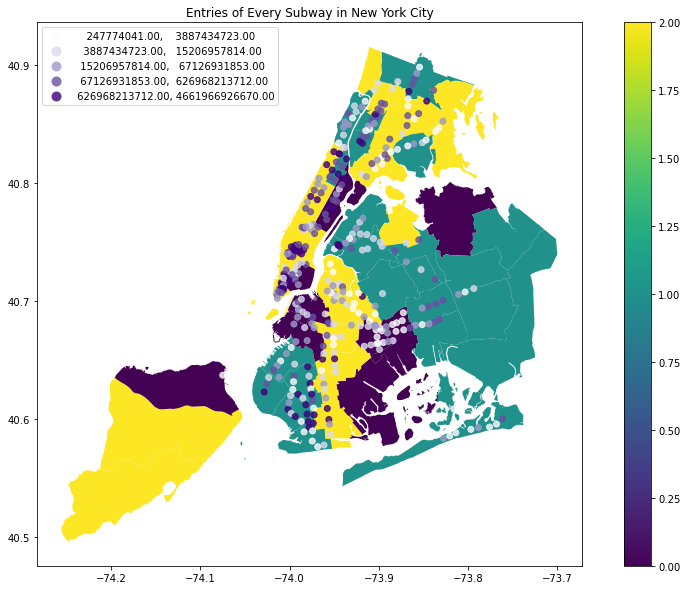

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
PUMA.plot(ax=ax,alpha=1,column='cluster', cmap='viridis', legend=True)#PUMA.plot(ax=ax,alpha=1,column='cluster', cmap='Set2', scheme='quantiles', legend=True)
turn.plot(column='entries', ax=ax, legend=True, cmap='Purples', k=5,scheme='quantiles',  alpha=0.8)
plt.title('Entries of Every Subway in New York City')
#plt.legend(loc='upper left')
plt.show()

In [ ]:
NYC_turn.head(1)

,puma,shape_area,shape_leng,geometry,PUMA,index_right,stopname,entries,exits,diff,...,no_vehicle_rate,median_value,median_rent,pct_w_children,bachelors_degree,pct_foreign_born,pct_poor_english,pct_detached_unit,pct_renter,native_pop
0,3701,9.792852e+07,53227.113213,"POLYGON ((-73.89641 40.90450, -73.89636 40.903...",3701,260.0,kingsbridge rd,5.154105e+11,5.778869e+11,-6.247642e+10,...,19871,301600,1373,2532,28810,29.9,40.3,34.2,20.6,72280


In [ ]:
NYC_turn[['puma','stopname','diff','borough','pct_under_18','pct_over_65','pct_white','median_age','pct_latino',
          'pct_aa','unemployment_rt','drove_alone','public_trans','travel_time','median_income','below_poverty',
          'median_rooms','no_vehicle_rate','median_value','median_rent','avg_family_size','disbility','native_pop']]

,puma,stopname,diff,borough,pct_under_18,pct_over_65,pct_white,median_age,pct_latino,pct_aa,...,travel_time,median_income,below_poverty,median_rooms,no_vehicle_rate,median_value,median_rent,avg_family_size,disbility,native_pop
0,3701,kingsbridge rd,-6.247642e+10,Bronx,21.1,19.0,32.3,38.7,53569,13220,...,46.2,59995,3916,3.8,19871,301600,1373,3.17,13668,72280
1,3701,231 st,8.208285e+09,Bronx,21.1,19.0,32.3,38.7,53569,13220,...,46.2,59995,3916,3.8,19871,301600,1373,3.17,13668,72280
2,3701,238 st,3.919951e+09,Bronx,21.1,19.0,32.3,38.7,53569,13220,...,46.2,59995,3916,3.8,19871,301600,1373,3.17,13668,72280
3,3702,gun hill rd,1.143108e+11,Bronx,22.3,13.2,6.3,36.7,34809,96302,...,47.1,51581,5434,4.5,20967,415400,1330,3.62,21098,88680
4,3702,219 st,1.009971e+11,Bronx,22.3,13.2,6.3,36.7,34809,96302,...,47.1,51581,5434,4.5,20967,415400,1330,3.62,21098,88680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,4114,beach 60 st,1.986008e+10,Queens,27.2,14.1,34.2,35.7,30032,45041,...,51.1,53968,4515,4.5,15239,477300,1179,3.63,19241,92268
343,4114,beach 44 st,5.353698e+07,Queens,27.2,14.1,34.2,35.7,30032,45041,...,51.1,53968,4515,4.5,15239,477300,1179,3.63,19241,92268
344,4114,beach 36 st,-1.863571e+08,Queens,27.2,14.1,34.2,35.7,30032,45041,...,51.1,53968,4515,4.5,15239,477300,1179,3.63,19241,92268
345,4114,beach 25 st,-5.424616e+10,Queens,27.2,14.1,34.2,35.7,30032,45041,...,51.1,53968,4515,4.5,15239,477300,1179,3.63,19241,92268


In [ ]:
NYC_turn.merge(PUMA, on='PUMA')['cluster']

0      1
1      1
2      1
3      2
4      2
      ..
342    2
343    2
344    2
345    2
346    2
Name: cluster, Length: 347, dtype: int32

Text(0.5, 1.0, 'New York City PUMAs by Demographic Profile')

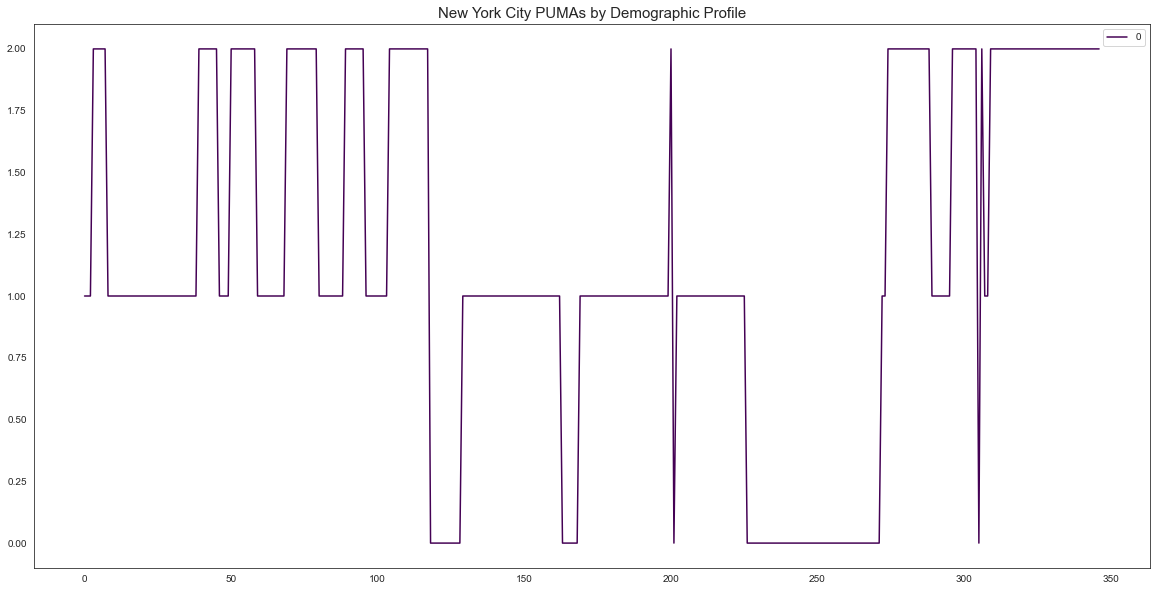

In [ ]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(20,10))
# NYC_turn.plot(ax=ax,alpha=1,column='cluster', cmap='viridis', scheme='quantiles', legend=True)
NYC_turn.merge(PUMA, on='PUMA')['cluster'].plot(ax=ax,alpha=1,cmap='viridis',legend=True)# scheme='quantiles', )
ax.legend([0,1,2])
plt.title('New York City PUMAs by Demographic Profile', fontsize=15)
# plt.savefig('NYC_demo_map.png')

AttributeError: 'Line2D' object has no property 'column'

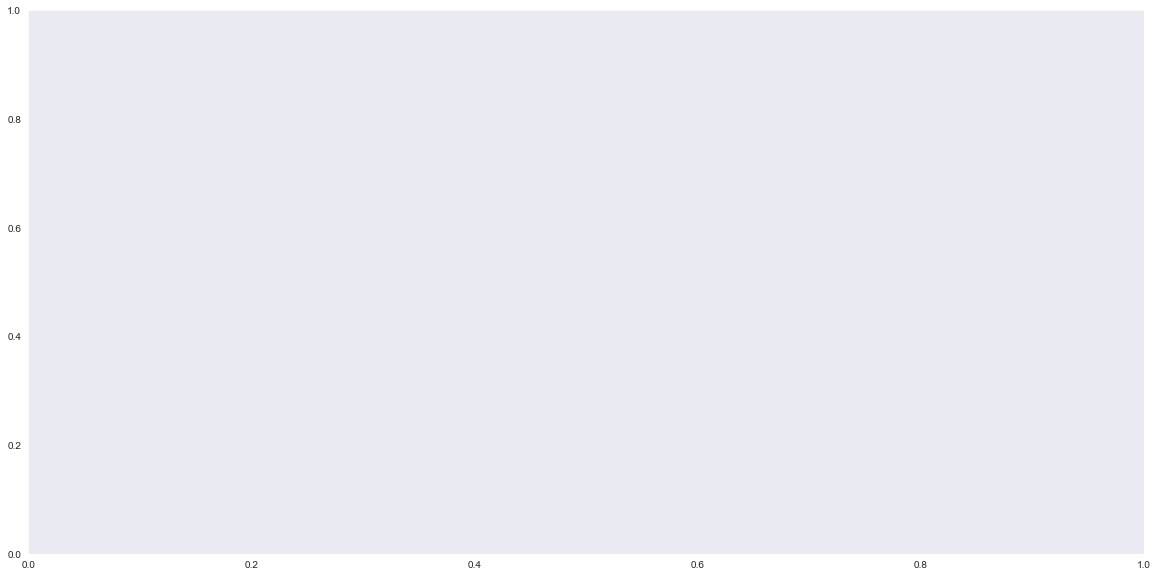

In [ ]:
sns.set_style('dark')

fig, ax = plt.subplots(figsize=(20,10))
NYC_turn.plot(ax=ax, alpha=1,column='cluster', cmap='viridis')
StationByCT.plot(column='pct_change', ax=ax, legend=True, scheme='quantiles', k=5, cmap='Greys')
plt.title('2020 Pct Change in Subway Ridership (PUMA)')
plt.savefig('subway_ridership_over_demo.png')

In [ ]:
scaler = StandardScaler()
pumaS = scaler.fit_transform(puma)

In [ ]:
pca = PCA(2)
puma2=pca.fit_transform(pumaS)
eigenvalues = pca.explained_variance_ratio_
eigenvalues

array([0.37843976, 0.22089376])

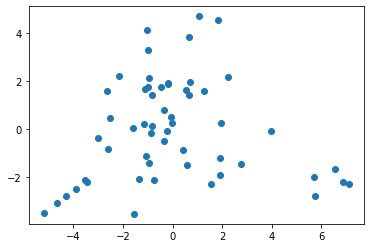

In [ ]:
puma2 = pd.DataFrame(puma2)
plt.scatter(puma2[0], puma2[1])

# puma shapefiles

In [ ]:
hous_puma = gpd.read_file('HousingDB_by_PUMA.shp')
print(hous_puma)

             boro  puma2010  \
0           Bronx      3702   
1           Bronx      3704   
2           Bronx      3707   
3           Bronx      3709   
4       Manhattan      3804   
5       Manhattan      3805   
6       Manhattan      3807   
7   Staten Island      3901   
8   Staten Island      3903   
9        Brooklyn      4001   
10       Brooklyn      4002   
11       Brooklyn      4003   
12       Brooklyn      4004   
13       Brooklyn      4005   
14       Brooklyn      4010   
15       Brooklyn      4012   
16       Brooklyn      4013   
17       Brooklyn      4014   
18       Brooklyn      4016   
19       Brooklyn      4018   
20         Queens      4101   
21         Queens      4103   
22         Queens      4105   
23         Queens      4106   
24         Queens      4107   
25         Queens      4108   
26         Queens      4110   
27         Queens      4111   
28         Queens      4113   
29          Bronx      3701   
30          Bronx      3706   
31      

In [ ]:
hous_df = pd.DataFrame(hous_puma)
hous_df.head()

,boro,puma2010,pumaname10,comp2010ap,comp2010,comp2011,comp2012,comp2013,comp2014,comp2015,...,permitted,withdrawn,inactive,cenunits10,adjunits10,total,totaladj,Shape_Leng,Shape_Area,geometry
0,Bronx,3702,"Bronx CD 12 - Wakefield, Williamsbridge & Wood...",126,187,317,169,262,203,259,...,999,180,218,52388,52388,54631,54631,106050.000952,1.889860e+08,"POLYGON ((1021632.336 267934.440, 1022108.578 ..."
1,Bronx,3704,"Bronx CD 11 - Pelham Parkway, Morris Park & La...",63,72,46,21,35,14,17,...,440,125,155,47627,47627,48156,48156,47970.790121,1.062136e+08,"POLYGON ((1029641.165 248417.271, 1029604.462 ..."
2,Bronx,3707,"Bronx CD 05 - Morris Heights, Fordham South & ...",168,303,200,152,0,276,209,...,1630,730,638,45683,45683,48398,48398,37374.595729,4.228107e+07,"POLYGON ((1012009.465 253420.020, 1012066.459 ..."
3,Bronx,3709,"Bronx CD 09 - Castle Hill, Clason Point & Park...",293,298,158,48,134,32,318,...,1158,268,174,68118,68118,70504,70504,73288.770479,1.241178e+08,"MULTIPOLYGON (((1029456.001 237188.918, 102937..."
4,Manhattan,3804,Manhattan CD 11 - East Harlem,442,926,625,390,272,611,115,...,1479,855,795,48728,48728,53210,53210,62599.502601,6.461212e+07,"MULTIPOLYGON (((1006028.598 231058.796, 100608..."


# factor evaluation

### 1. accessibility/connectivity

In [ ]:
demo_puma = pd.read_excel('demo_2018_acs5yr_puma.xlsx')
econ_puma = pd.read_excel('econ_2018_acs5yr_puma.xlsx')

demo = demo_puma[['GeogName', 'GeoID', 'Pop65pl1E']]
#demo.GeoID = str(demo.GeoID)
econ = econ_puma[['GeogName', 'CW_PbTrnsE', 'Pv500plE']]

access = demo.merge(econ, on='GeogName', how='outer')
#access = pd.merge(access, PUMA, left_on='GeoID', right_on='puma', how='outer')
access.head()

,GeogName,GeoID,Pop65pl1E,CW_PbTrnsE,Pv500plE
0,NYC-Bronx Community District 1 & 2--Hunts Poin...,3710,13908,35675,8492
1,"NYC-Bronx Community District 10--Co-op City, P...",3703,24107,23532,36142
2,NYC-Bronx Community District 11--Pelham Parkwa...,3704,18609,29517,26734
3,"NYC-Bronx Community District 12--Wakefield, Wi...",3702,19612,33498,29438
4,"NYC-Bronx Community District 3 & 6--Belmont, C...",3705,16072,38249,9870


In [ ]:
access['GeoID'] = access['GeoID'].astype(int)
PUMA['puma'] = PUMA['puma'].astype(int)

In [ ]:
access2 = pd.merge(access, PUMA, left_on='GeoID', right_on='puma', how='outer')
access2.columns=['GeoGName', 'GeoID', 'Pop65+', 'PublicTrans', 'poverty5+', 'puma', 'shape_area', 'shape_leng', 'geometry', 'PUMA', 'cluster']
access2.head()

,GeoGName,GeoID,Pop65+,PublicTrans,poverty5+,puma,shape_area,shape_leng,geometry,PUMA,cluster
0,NYC-Bronx Community District 1 & 2--Hunts Poin...,3710,13908,35675,8492,3710,1.377603e+08,90067.955971,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",3710,2
1,"NYC-Bronx Community District 10--Co-op City, P...",3703,24107,23532,36142,3703,2.676436e+08,305269.140135,"MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ...",3703,2
2,NYC-Bronx Community District 11--Pelham Parkwa...,3704,18609,29517,26734,3704,1.062169e+08,47970.203110,"POLYGON ((-73.84793 40.87134, -73.84725 40.870...",3704,2
3,"NYC-Bronx Community District 12--Wakefield, Wi...",3702,19612,33498,29438,3702,1.889936e+08,106167.593516,"POLYGON ((-73.86477 40.90201, -73.86305 40.901...",3702,1
4,"NYC-Bronx Community District 3 & 6--Belmont, C...",3705,16072,38249,9870,3705,1.224837e+08,68697.600392,"POLYGON ((-73.87046 40.86663, -73.87042 40.865...",3705,2


Text(0.5, 1.0, 'Population of 65+ in PUMA zones')

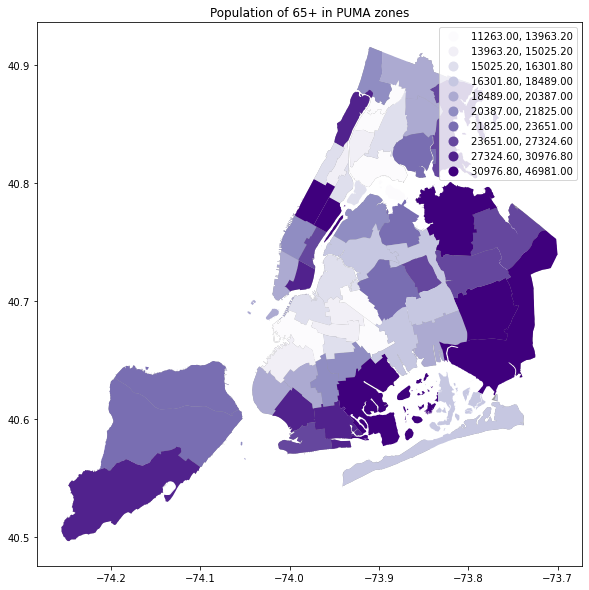

In [ ]:
from geopandas import GeoDataFrame

access2 = GeoDataFrame(access2)

fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
access2.plot(column='Pop65+', ax=ax, legend=True, cmap='Purples',scheme='quantiles', k=10)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Population of 65+ in PUMA zones')

Text(0.5, 1.0, 'Number of People Taking Public Transportation in PUMA zones')

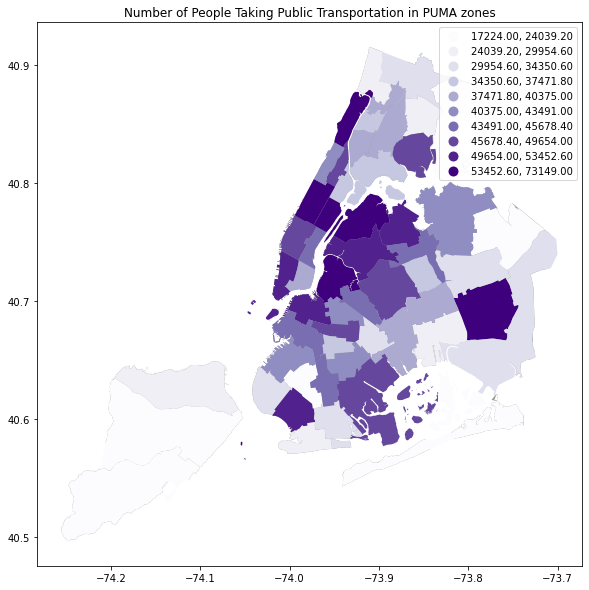

In [ ]:
from geopandas import GeoDataFrame

access2 = GeoDataFrame(access2)

fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
access2.plot(column='PublicTrans', ax=ax, legend=True, cmap='Purples',scheme='quantiles', k=10)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Number of People Taking Public Transportation in PUMA zones')

Text(0.5, 1.0, 'Ratio of Income to Poverty Level about 5 in PUMA zones')

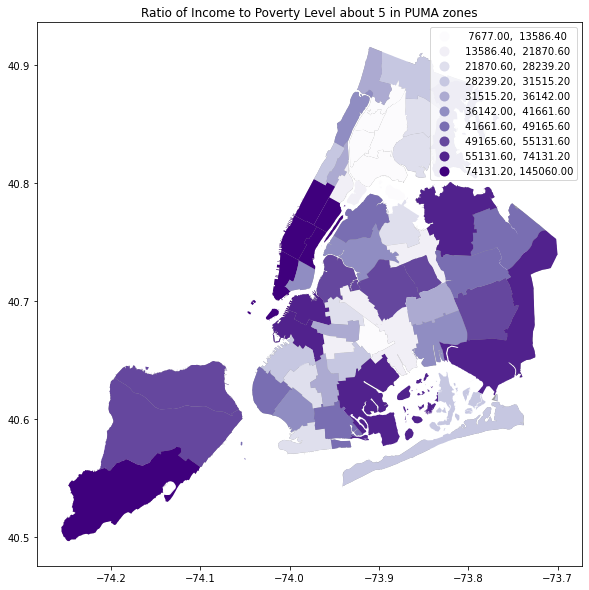

In [ ]:
from geopandas import GeoDataFrame

access2 = GeoDataFrame(access2)

fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
access2.plot(column='poverty5+', ax=ax, legend=True, cmap='Purples',scheme='quantiles', k=10)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Ratio of Income to Poverty Level about 5 in PUMA zones')

### 2. economical development

In [ ]:
pluto.numfloors

0         2.0
1         0.0
2         2.0
3         0.0
4         0.0
         ... 
858920    NaN
858921    NaN
858922    NaN
858923    NaN
858924    NaN
Name: numfloors, Length: 858925, dtype: float64

In [ ]:
pluto.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healthcenterdistrict',
       'healtharea', 'sanitboro', 'sanitdistrict', 'sanitsub', 'address',
       'zonedist1', 'zonedist2', 'zonedist3', 'zonedist4', 'overlay1',
       'overlay2', 'spdist1', 'spdist2', 'spdist3', 'ltdheight', 'splitzone',
       'bldgclass', 'landuse', 'easements', 'ownertype', 'ownername',
       'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea',
       'garagearea', 'strgearea', 'factryarea', 'otherarea', 'areasource',
       'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'lotfront',
       'lotdepth', 'bldgfront', 'bldgdepth', 'ext', 'proxcode', 'irrlotcode',
       'lottype', 'bsmtcode', 'assessland', 'assesstot', 'exempttot',
       'yearbuilt', 'yearalter1', 'yearalter2', 'histdist', 'landmark',
       'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl',
       'condono', 'tract2010', 'xcoo

In [ ]:
ecodev = pluto[['borough', 'block', 'numfloors', 'bldgarea', 'assesstot', 'latitude', 'longitude']]
ecodev

,borough,block,numfloors,bldgarea,assesstot,latitude,longitude
0,QN,11610,2.0,1280.0,33300.0,40.684899,-73.812723
1,SI,3762,0.0,0.0,180.0,40.577593,-74.086688
2,QN,11614,2.0,1920.0,54420.0,40.685650,-73.808989
3,QN,16021,0.0,0.0,17160.0,40.599144,-73.798563
4,SI,8040,0.0,0.0,20280.0,40.512852,-74.238777
...,...,...,...,...,...,...,...
858920,QN,2482,NaN,NaN,NaN,40.733183,-73.892668
858921,BK,5680,NaN,549.0,0.0,40.635996,-74.003250
858922,BX,9999,NaN,NaN,NaN,40.852574,-73.904661
858923,BX,9999,NaN,NaN,NaN,40.852456,-73.904222


In [ ]:
ecodev.dropna(inplace=True)

<ipython-input-93-a3fb2bb68f28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecodev.dropna(inplace=True)


In [ ]:
Geometry = [Point(xy) for xy in zip(ecodev.longitude, ecodev.latitude)]

geoLatLon = gpd.GeoDataFrame(ecodev,geometry=Geometry,crs={'init': 'epsg:4326'})

/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
geoLatLon.head()

,borough,block,numfloors,bldgarea,assesstot,latitude,longitude,geometry
0,QN,11610,2.0,1280.0,33300.0,40.684899,-73.812723,POINT (-73.81272 40.68490)
1,SI,3762,0.0,0.0,180.0,40.577593,-74.086688,POINT (-74.08669 40.57759)
2,QN,11614,2.0,1920.0,54420.0,40.685650,-73.808989,POINT (-73.80899 40.68565)
3,QN,16021,0.0,0.0,17160.0,40.599144,-73.798563,POINT (-73.79856 40.59914)
4,SI,8040,0.0,0.0,20280.0,40.512852,-74.238777,POINT (-74.23878 40.51285)


In [ ]:
# keep geoLatLon that is in the zones of zips

ecodev_merged = gpd.sjoin(neighbourhoods,geoLatLon,op='intersects',how='inner')
ecodev_merged.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-96-30a26695a201>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: +init=epsg:4326 +type=crs

  ecodev_merged = gpd.sjoin(neighbourhoods,geoLatLon,op='intersects',how='inner')


,neighbourhood,neighbourhood_group,geometry,index_right,borough,block,numfloors,bldgarea,assesstot,latitude,longitude
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...",54117,BX,4590,1.5,2067.0,38520.0,40.870267,-73.847678
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...",331186,BX,4589,2.5,3117.0,49020.0,40.870278,-73.848249
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...",745752,BX,4589,3.0,3873.0,57540.0,40.870315,-73.848618
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...",630815,BX,4590,1.5,1698.0,37140.0,40.870346,-73.847306
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...",484372,BX,4590,2.0,2780.0,45420.0,40.870368,-73.847674


In [ ]:
type(geoLatLon)

geopandas.geodataframe.GeoDataFrame

In [ ]:
geoLatLon.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

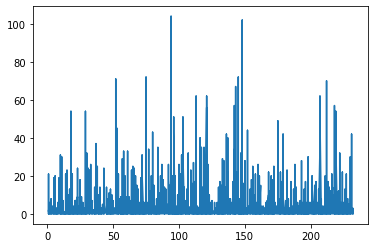

In [ ]:
ecodev_merged.numfloors.plot()

In [51]:
uploaded = files.upload()

Saving geoLatLon.csv to geoLatLon.csv


In [54]:
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [55]:
geoLatLon = pd.read_csv('geoLatLon.csv')
geoLatLon = GeoDataFrame(geoLatLon)
geoLatLon.head()

,Unnamed: 0,borough,block,numfloors,bldgarea,assesstot,latitude,longitude,geometry
0,0,QN,11610,2.0,1280.0,33300.0,40.684899,-73.812723,POINT (-73.81272319999999 40.6848987)
1,1,SI,3762,0.0,0.0,180.0,40.577593,-74.086688,POINT (-74.08668780000001 40.5775928)
2,2,QN,11614,2.0,1920.0,54420.0,40.685650,-73.808989,POINT (-73.8089892 40.6856501)
3,3,QN,16021,0.0,0.0,17160.0,40.599144,-73.798563,POINT (-73.7985632 40.5991439)
4,4,SI,8040,0.0,0.0,20280.0,40.512852,-74.238777,POINT (-74.2387768 40.5128522)


/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/anaconda3/lib/python3.8/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 5
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 1.0, 'Number of Floors in Each Neighbourhoods')

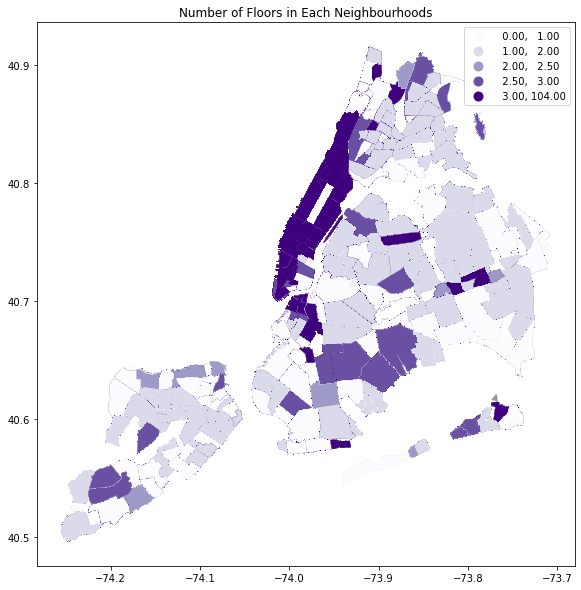

In [ ]:
from geopandas import GeoDataFrame

#access2 = GeoDataFrame(access2)

fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
ecodev_merged.plot(column='numfloors', ax=ax, legend=True, cmap='Purples',scheme='quantiles', k=10)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Number of Floors in Each Neighbourhoods')

Text(0.5, 1.0, 'Building Area in Each Neighbourhoods')

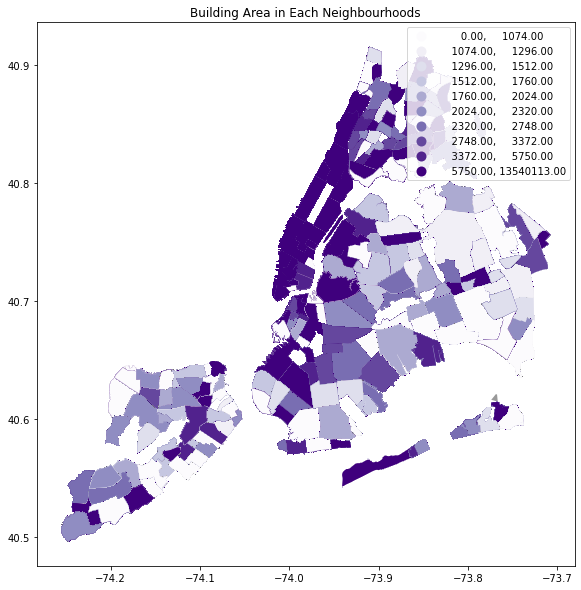

In [ ]:
from geopandas import GeoDataFrame

#access2 = GeoDataFrame(access2)

fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
ecodev_merged.plot(column='bldgarea', ax=ax, legend=True, cmap='Purples',scheme='quantiles', k=10)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Building Area in Each Neighbourhoods')

Text(0.5, 1.0, 'Assessed Total Value in Each Neighbourhoods')

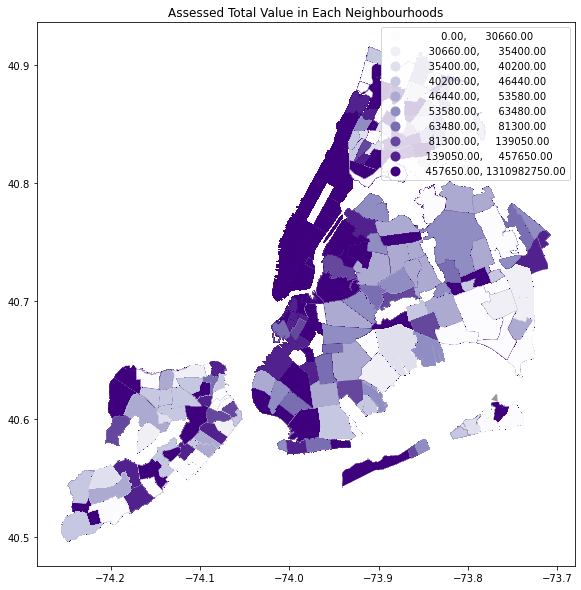

In [ ]:
from geopandas import GeoDataFrame

#access2 = GeoDataFrame(access2)

fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
ecodev_merged.plot(column='assesstot', ax=ax, legend=True, cmap='Purples',scheme='quantiles', k=10)#scheme='quantiles', 
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
plt.title('Assessed Total Value in Each Neighbourhoods')

In [3]:
import os 
import folium
from folium import plugins
#import rasterio as rio
#from rasterio.warp import calculate_default_transform, reproject, Resampling
#import earthpy as et

In [6]:
m = folium.Map(location=[40.7, -74])

# Display the map
m

In [10]:
busiest = ['23 St', 'Canal St', '125 St', '86 St', 'Bay Pkwy', '18 Av', '145 St', 'Fulton St', '104 St', 'Chambers St']
sta = station[station.stop_name.isin(busiest)]
sta.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry
13,14,14.0,14,R19,BMT,Broadway - Brighton,23 St,M,R W,Subway,40.741303,-73.989344,Uptown & Queens,Downtown & Brooklyn,POINT (-73.98934 40.74130)
17,18,18.0,623,R23,BMT,Broadway,Canal St,M,R W,Subway,40.719527,-74.001775,Uptown & Queens,Downtown & Brooklyn,POINT (-74.00177 40.71953)
18,19,19.0,623,Q01,BMT,Manhattan Bridge,Canal St,M,N Q,Subway,40.718383,-74.000460,Uptown & Queens,Downtown & Brooklyn,POINT (-74.00046 40.71838)
37,38,38.0,38,R44,BMT,4th Av,86 St,Bk,R,Subway,40.622687,-74.028398,Manhattan,95 St,POINT (-74.02840 40.62269)
65,66,66.0,66,B19,BMT,West End,18 Av,Bk,D,Elevated,40.607954,-74.001736,Manhattan,Coney Island,POINT (-74.00174 40.60795)


In [97]:
geoLatLon.head()

,Unnamed: 0,borough,block,numfloors,bldgarea,assesstot,latitude,longitude,geometry
0,0,QN,11610,2.0,1280.0,33300.0,40.684899,-73.812723,POINT (-73.81272319999999 40.6848987)
1,1,SI,3762,0.0,0.0,180.0,40.577593,-74.086688,POINT (-74.08668780000001 40.5775928)
2,2,QN,11614,2.0,1920.0,54420.0,40.685650,-73.808989,POINT (-73.8089892 40.6856501)
3,3,QN,16021,0.0,0.0,17160.0,40.599144,-73.798563,POINT (-73.7985632 40.5991439)
4,4,SI,8040,0.0,0.0,20280.0,40.512852,-74.238777,POINT (-74.2387768 40.5128522)


In [11]:
from folium import Circle

#fig, ax = plt.subplots(figsize=(25,25))

m = folium.Map(location=[40.7, -74])
busiest = ['23 St', 'Canal St', '125 St', '86 St', 'Bay Pkwy', '18 Av', '145 St', 'Fulton St', '104 St', 'Chambers St']

for i in range(len(sta)):
    Circle(
		    location=[sta.iloc[i]['gtfs_latitude'], sta.iloc[i]['gtfs_longitude']],
		    radius=150,
		    color='red',fill_color='red',fillOpacity=0.8
    ).add_to(m)

#for i in range(len(geoLatLon)):
#    Circle(
#		    location=[geoLatLon.iloc[i]['latitude'], geoLatLon.iloc[i]['longitude']],
#		    radius=1,
#		    color='purple'
#    ).add_to(m)

#geoLatLon.plot(ax=ax, column='numfloors', legend=True, cmap='Purples',scheme='quantiles', k=10)

#for i in range(len(busiest)):
#    for j in range(len(station[station.stop_name==busiest[i]])):
#	      Circle(
#		        location=[station[station.stop_name==busiest[i]].iloc[j]['gtfs_latitude'], station[station.stop_name==busiest[i]].iloc[j]['gtfs_longitude']],
#		        radius=100
#		        #color='orange'
#        ).add_to(m)#color_producer(hospitals.iloc[i]['capacity'])).add_to(bubble_map)

#for i in range(len(busiest)):
#    for j in range(len(station[station.stop_name==busiest[i]])):
#        folium.Marker(
#            location=[station[station.stop_name==busiest[i]].iloc[j].gtfs_latitude, station[station.stop_name==busiest[i]].iloc[j].gtfs_longitude], # coordinates for the marker (Earth Lab at CU Boulder)
#            popup='Earth Lab at CU Boulder' # pop-up label for the marker
#            #icon=folium.Icon()
#        ).add_to(m)


m

In [65]:
station[station.stop_name==busiest[0]].iloc[0].gtfs_longitude, station[station.stop_name==busiest[0]].iloc[0].gtfs_latitude

(-73.98934399999999, 40.741303)

In [70]:
help(folium.Icon)

Help on class Icon in module folium.map:

class Icon(branca.element.MacroElement)
 |  Icon(color='blue', icon_color='white', icon='info-sign', angle=0, prefix='glyphicon')
 |  
 |  Creates an Icon object that will be rendered
 |  using Leaflet.awesome-markers.
 |  
 |  Parameters
 |  ----------
 |  color : str, default 'blue'
 |      The color of the marker. You can use:
 |  
 |          ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
 |           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
 |           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
 |           'gray', 'black', 'lightgray']
 |  
 |  icon_color : str, default 'white'
 |      The color of the drawing on the marker. You can use colors above,
 |      or an html color code.
 |  icon : str, default 'info-sign'
 |      The name of the marker sign.
 |      See Font-Awesome website to choose yours.
 |      Warning : depending on the icon you choose you may need to adapt
 |      the `prefix` as

In [ ]:
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

busiest = ['23 St', 'Canal St', '125 St', '86 St', 'Bay Pkwy', '18 Av', '145 St', 'Fulton St', '104 St', 'Chambers St']

fig, ax = plt.subplots(figsize=(25,25))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
#ecodev_merged.plot(column='assesstot', ax=ax, legend=True, cmap='Purples',scheme='quantiles', k=10)#scheme='quantiles', 
geoLatLon.plot(ax=ax, column='assesstot', legend=True, cmap='Purples',scheme='quantiles', k=10)
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)

for i in range(len(busiest)):
    for j in range(len(station[station.stop_name==busiest[i]])):
        Drawing_colored_circle = plt.Circle((station[station.stop_name==busiest[i]].iloc[j].gtfs_latitude, station[station.stop_name==busiest[i]].iloc[j].gtfs_longitude),0.003623,color='yellow')
        ax.set_aspect(1)
        ax.add_artist( Drawing_colored_circle )
stationgeo[stationgeo.stop_name.isin(busiest)].plot(ax=ax, color='green')

plt.title('Assessed Total Value in Each Neighbourhoods')